In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-05-18 14:37:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.187.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   128MB/s    in 4.7s    

2021-05-18 14:37:20 (106 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
zip_ref = zipfile.ZipFile("/content/10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [7]:
!ls /content/10_food_classes_all_data/train/

chicken_curry  fried_rice      hamburger  pizza  steak
chicken_wings  grilled_salmon  ice_cream  ramen  sushi


In [9]:
import os

for dirpath, dirnames, filenames in os.walk('/content/10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


There are 2 directories and 0 images in /content/10_food_classes_all_data
There are 10 directories and 0 images in /content/10_food_classes_all_data/test
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/steak
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/ice_cream
There are 0 directories a

In [10]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir + target_class
  random_img = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder+"/"+random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f"Image Shape: {img.shape}")
  return img

Image Shape: (512, 512, 3)


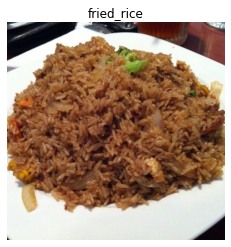

In [16]:
img = view_random_image(target_dir="/content/10_food_classes_all_data/train/",target_class="fried_rice")

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=0.2,
                                   shear_range = 0.2,
                                   horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode='categorical',
                                               shuffle=True
                                               )

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [33]:
#Build a CNN model

model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(224,224,3)),                       
      tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
      tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),                        
      tf.keras.layers.MaxPool2D(2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(10,activation='softmax') 
])

In [34]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [35]:
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch = len(train_data),
                    validation_data = valid_data,
                    validation_steps = len(valid_data))

Epoch 1/5
235/235 [==============================] - 126s 535ms/step - loss: 2.5214 - accuracy: 0.1758 - val_loss: 2.0949 - val_accuracy: 0.2556
Epoch 2/5
235/235 [==============================] - 124s 528ms/step - loss: 1.9582 - accuracy: 0.3164 - val_loss: 1.9177 - val_accuracy: 0.3300
Epoch 3/5
235/235 [==============================] - 122s 520ms/step - loss: 1.7964 - accuracy: 0.3911 - val_loss: 1.8376 - val_accuracy: 0.3588
Epoch 4/5
235/235 [==============================] - 124s 529ms/step - loss: 1.5080 - accuracy: 0.5124 - val_loss: 1.9310 - val_accuracy: 0.3656
Epoch 5/5
235/235 [==============================] - 125s 530ms/step - loss: 1.1582 - accuracy: 0.6336 - val_loss: 1.9540 - val_accuracy: 0.3936


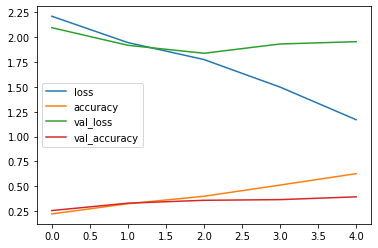

In [36]:
pd.DataFrame(history.history).plot()

# Sample Prediction

In [78]:
!wget "http://4.bp.blogspot.com/-n-jZjyEzncE/Uq8IxN6-giI/AAAAAAAADWk/OL-YhSPEG_4/s1600/Pizza+Food+Hd+Wallpaper.jpg"

--2021-05-18 14:20:26--  http://4.bp.blogspot.com/-n-jZjyEzncE/Uq8IxN6-giI/AAAAAAAADWk/OL-YhSPEG_4/s1600/Pizza+Food+Hd+Wallpaper.jpg
Resolving 4.bp.blogspot.com (4.bp.blogspot.com)... 172.253.114.132, 2607:f8b0:4001:c22::84
Connecting to 4.bp.blogspot.com (4.bp.blogspot.com)|172.253.114.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272685 (266K) [image/jpeg]
Saving to: ‘Pizza+Food+Hd+Wallpaper.jpg’

Pizza+Food+Hd+Wallp 100%[===================>] 266.29K  --.-KB/s    in 0.001s  

2021-05-18 14:20:26 (282 MB/s) - ‘Pizza+Food+Hd+Wallpaper.jpg’ saved [272685/272685]



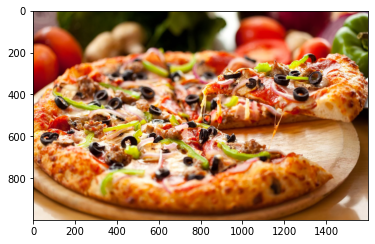

In [79]:
sampleimg = mpimg.imread("/content/Pizza+Food+Hd+Wallpaper.jpg")
plt.imshow(sampleimg)


In [80]:
sampleimg = tf.expand_dims(sampleimg,axis=0)
sampleimg = tf.cast(sampleimg,dtype=tf.float32)/255.
sampleimg = tf.image.resize(sampleimg,size=[224,224])

In [81]:
sampleimg.shape

TensorShape([1, 224, 224, 3])

In [82]:
model.predict(sampleimg)

array([[0.13817446]], dtype=float32)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 89888)             0